# Webmining - Assignment 4

This **Home Assignment** is to be submitted and you will be given points for each of the tasks. This task is all about time series. You will first write a function gets the time viewcount for wikipedia articles. You will then go ahead and try to find viewcount histories that show interesting behaviour. Finally you are asked to implement single exponential and holtz smoothing.
You can use the numpy, requests and all of the standard library.

## Formalities
**Submit in a group of 2-3 people until 08.07.2020 23:59CET. The deadline is strict!**

## Evaluation and Grading
General advice for programming excercises at *CSSH*:
Evaluation of your submission is done semi automatically. Think of it as this notebook being 
executed once. Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Use external libraries only when specified by task.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature of e.g. a function usually can be inferred from task description, 
  code skeletons and test cases.
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Double check if your code relies on presence of files or directories other than those mentioned
    in given tasks. Tests run under Linux, hence don't use Windows style paths 
    (`some\path`, `C:\another\path`). Also, use paths only that are relative to and within your
    working directory (OK: `some/path`, `./some/path`; NOT OK: `/home/alice/python`, 
    `../../python`).
* Keep your code idempotent! Running it or parts of it multiple times must not yield different
  results. Minimize usage of global variables.
* Ensure your code / notebook terminates in reasonable time.

**There's a story behind each of these points! Don't expect us to fix your stuff!**

Regarding the scores, you will get no points for a task if:
- your function throws an unexpected error (e.g. takes the wrong number of arguments)
- gets stuck in an infinite loop
- takes much much longer than expected (e.g. >1s to compute the mean of two numbers)
- does not produce the desired output (e.g. returns an descendingly sorted list even though we asked for ascending, returns the mean and the std even though we asked for only the mean, prints an output instead of returning it, ...)

# Task 1: Time series (6 points total)

## a) Fetching wikipedia view counts (1.5)

Write a function `get_counts(title, start, end, language_edition="en")` that takes in the title of a wikipedia page, a starting date and an ending date, as well as an optional language edition for that particular title. `start` and `end` are supplied as python `date` objects.

It returns the timestamps (as a list of `date` objects) and the view counts (as a list of integers) for that particular article in the given timespan. If there are errors when retrieving the data return empty lists. Return them lower incluse, upper inclusive.

Link example for Albert Einstein retrieving from the first of november 2017 up to the 30 november 2018: 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Albert_Einstein/daily/20171101/20181130'.

## b) Experimentation (0.5+0.75+0.75 = 2)

Find combinations of `(title, start, end, language_edition)` such that when plotted you can clearly see

1) There is no clear seasonality or periodicity (`nothing.png`)

2) There is a clear seasonality (`seasonality.png`)

3) There is clearly is something repetitive but it is not seasonality (`repetitive.png`)

Save plots for the three different kinds of time series under their corresponding names.
For the seasonality plot also show the length of one period. Use different articles for each of the tasks. To have good enough statistics, make sure there are at least 500 views per day.

## c) Time Series prediction (single exponential) (1)

Write a function `single_exponential_smoothing(values, h, alpha)` that performs time series prediction/forecast for the next 1..h time-steps using single exponential smoothing with parameter `alpha`. Initialialise `l[0] = values[0]`.


## d) Time Series prediction (Holts) (1.5)

Write a function `holts_smoothing(values, h, alpha, beta)` that performs time series prediction/forecast for the next 1..h time-steps using Holts smoothing with parameters `alpha` and `beta`. Initialialise `l[0] = values[0]` and `b[0] = values[1] - values[0]`.

In [1]:
from datetime import date
import requests
import datetime

In [2]:
def get_counts(title, start, end, language_edition="en"):
    interface = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/' + language_edition + '.wikipedia/all-access/all-agents/' + title + '/daily/' + ''.join(start.strftime("%Y%m%d")) + '/' + ''.join(end.strftime("%Y%m%d"))
    r = requests.get(url=interface)
    dates, views = [], []
    if r.status_code == 200:
        data = list(r.json().values())[0]
        for d in data:
            time_string = d['timestamp']
            dt = date(int(time_string[:4]), int(time_string[4:6]),int(time_string[6:8]))
            views.append(d['views'])
            dates.append(dt)
    else:
        return dates,views
    return dates,views
   
    
s = date(2018,11,30)
e = date(2018,12,3)
print(get_counts("Albert_Einstein",s,e))
#([datetime.date(2018, 11, 30),
#  datetime.date(2018, 12, 1),
#  datetime.date(2018, 12, 2),
#  datetime.date(2018, 12, 3)],
# [17631, 14710, 16126, 17995])

s = date(2018,12,30)
e = date(2019, 1,3)
print(get_counts("Bier",s,e, "de"))
#([datetime.date(2018, 12, 30),
# datetime.date(2018, 12, 31),
# datetime.date(2019, 1, 1),
# datetime.date(2019, 1, 2),
# datetime.date(2019, 1, 3)], 
# [1090, 783, 732, 790, 842])


s = date(2010,12,30)
e = date(2011, 1,3)
print(get_counts("Albert_Einstein",s,e))
# error case
# [], []

s = date(2019,12,30)
e = date(2019, 1, 3)
print(get_counts("Albert_Einstein",s,e))
# error case
# [], []

s = date(2019,12,30)
e = date(2020, 1, 3)
print(get_counts("asdjhsalkjhdkash",s,e))
# error case
# [], []

([datetime.date(2018, 11, 30), datetime.date(2018, 12, 1), datetime.date(2018, 12, 2), datetime.date(2018, 12, 3)], [17631, 14710, 16126, 17995])
([datetime.date(2018, 12, 30), datetime.date(2018, 12, 31), datetime.date(2019, 1, 1), datetime.date(2019, 1, 2), datetime.date(2019, 1, 3)], [1090, 783, 732, 790, 842])
([], [])
([], [])
([], [])


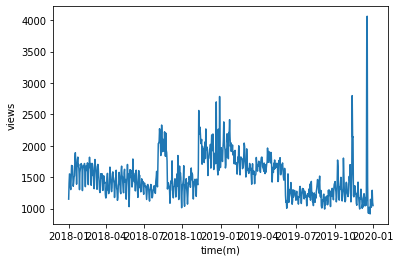

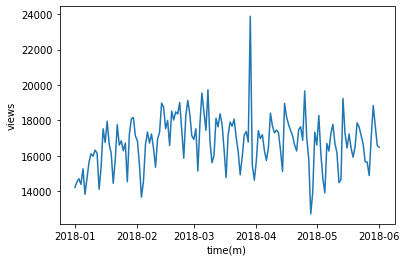

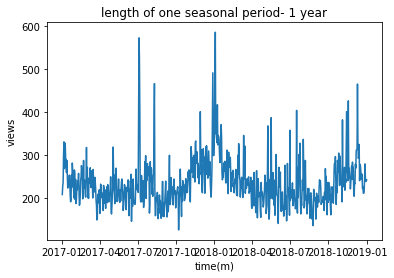

In [6]:
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pyplot import MultipleLocator


# def get_month_range(start_day,end_day):
#   months = (end_day.year - start_day.year)*12 + end_day.month - start_day.month
#   month_range = ['%s-%s'%(start_day.year + mon//12,mon%12+1) 
#                     for mon in range(start_day.month-1,start_day.month + months)]
#   return [datetime.strptime(i, '%Y-%m') for i in month_range]

#nothing
s1 = date(2018,1,1)
e1 = date(2020,1,1)
X_1, Y_1 = get_counts("Train",s1,e1)
plt.figure()
plt.plot(X_1,Y_1)
plt.axis('auto')
plt.xlabel("time(m)")
plt.ylabel("views")
# ax=plt.gca()
# x_major_locator=MultipleLocator(10)
# ax.xaxis.set_major_locator(x_major_locator)
plt.savefig('nothing.png',dpi=300)
plt.show()

#repetive
s2 = date(2018,1,1)
e2 = date(2018,6,1)
X_2, Y_2 = get_counts("Germany",s2,e2)
plt.figure()
plt.plot(X_2,Y_2)
plt.axis('auto')
plt.xlabel("time(m)")
plt.ylabel("views")
# ax=plt.gca()
# x_major_locator=MultipleLocator(10)
# ax.xaxis.set_major_locator(x_major_locator)
plt.savefig('repetitive.png',dpi=300)
plt.show()

#seasonlity
s3 = date(2017,1,1)
e3 = date(2019,1,1)
X_3, Y_3 = get_counts("Cold",s3,e3)
plt.figure()
plt.plot(X_3,Y_3)
plt.axis('auto')
plt.xlabel("time(m)")
plt.ylabel("views")
# ax=plt.gca()
# x_major_locator=MultipleLocator(10)
# ax.xaxis.set_major_locator(x_major_locator)
plt.savefig('seasonality.png',dpi=300)
plt.title('length of one seasonal period- 1 year')
plt.show()


In [4]:
import numpy as np
def single_exponential_smoothing(values, h, alpha):
    values = np.array(values, dtype=np.float64)
    l = [values[0]] * len(values)
    l = np.array(l, dtype=np.float64)
    for i in range(1,len(l)):
        l[i] = np.multiply(values[i], alpha) + np.multiply((1-alpha), l[i-1])
    return [l[-1]]*h

print(single_exponential_smoothing([1,2,3,4], 2, 0.5))
# l = [1, 1.5, 2.25, 3.125]
# [3.125, 3.125]
print(single_exponential_smoothing([1,1.9,3.1,4.1], 2, 0.3))
# l = [1, 1.27, 1.819, 2.5032999999999994]
# [2.5032999999999994, 2.5032999999999994]
print(single_exponential_smoothing(np.sin(np.linspace(0,3)), 4, 0.1))
# [0.5173425352401494, 0.5173425352401494, 0.5173425352401494, 0.5173425352401494]

[3.125, 3.125]
[2.5032999999999994, 2.5032999999999994]
[0.5173425352401494, 0.5173425352401494, 0.5173425352401494, 0.5173425352401494]


In [5]:
def holts_smoothing(values, h, alpha, beta):
    values = np.array(values, dtype=np.float64)
    l = [values[0]] * len(values)
    b = [0]* len(values)
    b[0] = values[1] - values[0]
    l = np.array(l,dtype=np.float64)
    b = np.array(b,dtype=np.float64)
    for i in range(1,len(values)):
        l[i] = np.multiply(alpha, values[i]) + np.multiply((1-alpha), (l[i-1]+b[i-1]))
        b[i] = np.multiply(beta, (l[i]-l[i-1])) + np.multiply((1-beta), b[i-1])
    y = [0] * h
    for i in range(h):
        y[i] = l[-1] + (i+1)*b[-1]
    return y
    
print(holts_smoothing([1,2,3,4], 2, 0.5, 0.5))
# [5.0, 6.0]
# l=[1, 2.0, 3.0, 4.0]
# b=[1, 1.0, 1.0, 1.0]
print(holts_smoothing([1,1.9,3.1,4.1], 2, 0.3, 0.3))
# [4.854369999999999, 5.806839999999999]
# l= [1, 1.9, 2.8899999999999997, 3.9018999999999995]
# b= [0.8999999999999999, 0.8999999999999999, 0.9269999999999998, 0.9524699999999997]
print(holts_smoothing(np.sin(np.linspace(0,3)), 4, 0.1, 0.5))
# [0.09857994080989951, 0.035351062398172095, -0.027877816013555323, -0.09110669442528274]

[5.0, 6.0]
[4.854369999999999, 5.806839999999999]
[0.09857994080989951, 0.035351062398172095, -0.027877816013555323, -0.09110669442528274]
